# Point Cloud QoE Models

## Joint Communication and Computational Resource Allocation for QoE-driven Point Cloud Video Streaming

In [ ]:
def get_distance_weight(g, k, d):
    # p_g,k in equation (5)
    # input: tile k in GOF g, distance d from the viewer to the object
    # output: for simplicity: all tiles have the same distance as d.
    return 1/d


In [ ]:
def get_quality_weight(n, N):
    # QT_g,k in equation (5)
    # input: tile k in GOF g
    # output: the ratio of # of points in the tile k (n) to the total # of points in FOV (N)
    return n/N

In [ ]:
def get_quality_contribution(g, k, d, r):
    # output: quality contribution of tile k in GOF g with quality r at distance d
    distance_weight = get_distance_weight(g, k, d)
    quality_weight = get_quality_weight(n, N)

    return distance_weight * r * quality_weight


In [ ]:
def get_qoe_score (M, R, G, d):
    sum_1 = 0
    sum_2 = 0
    for g in range(G):
        for k in range(M):
            r = 1
            sum_1 += get_quality_contribution(g, k, d, r)
            sum_2 += get_quality_contribution(g, k, d, r) * R/r

    return sum_1/sum_2
    

## Objective metrics for PC compression

In [ ]:
import re
import matplotlib.pyplot as plt

In [ ]:
def calculate_frame_psnr(file):
    psnr_y = []
    psnr_cb = []
    psnr_cr = []
    psnr_color = []
    psnr_geometry = []

    with open(file) as f:
        lines = f.readlines()

        for line in lines:
            value = line.split(":")
            if len(value) > 1:
                if "c[0],PSNRF" in line:
                    psnr_y.append(float(value[1]))
                    continue

                if "c[1],PSNRF" in line:
                    psnr_cb.append(float(value[1]))
                    continue

                if "c[2],PSNRF" in line:
                    psnr_cr.append(float(value[1]))
                    continue
                if "mseF,PSNR" in line:
                    psnr_geometry.append(float(value[1]))
    
    # psnr_avg = 0
    for y, cb, cr in zip(psnr_y, psnr_cb, psnr_cr):
        psnr_color.append((6*y +cb + cr)/8)
        # psnr_avg += (4*y +cb + cr)/6

    # print("PSNR: ", psnr_frame)
    # f = open("psnr.txt", "a")
    # f.write("{}\t{}\n".format(file.split("/")[-1], psnr_frame))
    return psnr_color, psnr_geometry



In [ ]:
result_folder = "./results"
videos = ["BlueSpin", "FlowerDance", "ReadyForWinter", "CasualSquat"] # Shivi
qualities = ["r01", "r02", "r03", "r04", "r05"] # Shivi
psnr_color = {}
psnr_geometry = {}

for video in videos:
    psnr_color[video] = {}
    psnr_geometry[video] = {}
    for quality in qualities:
        file = "{}/{}_{}.txt".format(result_folder, video, quality)
        psnr_color[video][quality], psnr_geometry[video][quality] = calculate_frame_psnr(file)

In [ ]:
import numpy as np

video_psnr_color = {}
video_psnr_geometry = {}

for video in videos:
    video_psnr_color[video] = []
    for qual in qualities:
        psnr_frames_color = psnr_color[video][qual]
        video_psnr_color[video].append(np.average(psnr_frames_color))
        print("{}_{}_color: {}".format(video, qual, np.average(psnr_frames_color)))

for video in videos:
    video_psnr_geometry[video] = []
    for qual in qualities:
        psnr_frames_geometry = psnr_geometry[video][qual]
        video_psnr_geometry[video].append(np.average(psnr_frames_geometry))
        print("{}_{}_geometry: {}".format(video, qual, np.average(psnr_frames_geometry)))

In [ ]:
mos_BlueSpin = np.array([1.43902,  2.09756,  2.65854,  3.26829,  3.34146]) # [r1, r2, r3, r4, r5]
mos_CasualSquat = np.array([1.85366,  2.58537,  2.78049,  3.41463,  3.60976])
mos_FlowerDance = np.array([1.73171,  2.39024,  2.90244,  3.36585,  3.80488])
mos_ReadyForWinter = np.array([1.65854,  2.07317,  2.73171,  3.39024,  3.65854])

plt.scatter(mos_BlueSpin, video_psnr_color[videos[0]])
a, b = np.polyfit(mos_BlueSpin, video_psnr_color[videos[0]], 1)
print(a, b)
plt.plot(mos_BlueSpin, a*mos_BlueSpin+b)

plt.scatter(mos_CasualSquat, video_psnr_color[videos[3]])
a, b = np.polyfit(mos_CasualSquat, video_psnr_color[videos[3]], 1)
print(a, b)
plt.plot(mos_CasualSquat, a*mos_CasualSquat+b)

plt.scatter(mos_FlowerDance, video_psnr_color[videos[1]])
a, b = np.polyfit(mos_FlowerDance, video_psnr_color[videos[1]], 1)
print(a, b)
plt.plot(mos_FlowerDance, a*mos_FlowerDance+b)

plt.scatter(mos_ReadyForWinter, video_psnr_color[videos[2]])
a, b = np.polyfit(mos_ReadyForWinter, video_psnr_color[videos[2]], 1)
print(a, b)
plt.plot(mos_ReadyForWinter, a*mos_ReadyForWinter+b)

plt.legend()

In [ ]:
def linePlot(x, y, outputPath, title, legends, x_title, y_title):

    fig = plt.figure(figsize=(6, 4))

    i = 0
    for x_, y_ in zip(x,y):
        plt.scatter(x_, y_, label=legends[i])
        a, b = np.polyfit(x_, y_, 1)
        print(a, b)
        plt.plot(x_, a*x_+b)
        i += 1

    # plt.ylim(0,10)

    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
    plt.xlabel(x_title,fontsize=15)
    plt.ylabel(y_title,fontsize=15)
    plt.legend()
    plt.tight_layout()
    plt.savefig("{}/{}.pdf".format(outputPath, title))
    plt.show()

In [ ]:
x = [mos_BlueSpin, mos_CasualSquat, mos_FlowerDance, mos_ReadyForWinter]
y = [video_psnr_color[videos[0]], video_psnr_color[videos[3]], video_psnr_color[videos[1]], video_psnr_color[videos[2]]]

linePlot(x, y, "./figures", "PSNR_color",["BlueSpin", "CasualSquat", "FlowerDance", "ReadyForWinter"], "MOS", "Color PSNR")

In [ ]:
x = [mos_BlueSpin, mos_CasualSquat, mos_FlowerDance, mos_ReadyForWinter]
y = [video_psnr_geometry[videos[0]], video_psnr_geometry[videos[3]],  video_psnr_geometry[videos[1]],  video_psnr_geometry[videos[2]]]

linePlot(x, y, "./figures", "PSNR_geometry",["BlueSpin", "CasualSquat", "FlowerDance", "ReadyForWinter"], "MOS", "Geometry PSNR")

In [ ]:
# bitrate
bitrates = {
    'BlueSpin': {'r01': 1.75, 'r02': 2.29, 'r03': 3.17, 'r04': 7.53, 'r05': 12.62},
    'CasualSquat':  {'r01': 2.50, 'r02': 3.91, 'r03': 6.66, 'r04': 19.51, 'r05': 31.11},
    'ReadyForWinter':  {'r01': 1.97, 'r02': 2.58, 'r03': 3.61, 'r04': 9.34, 'r05': 16.59},
    'FlowerDance':  {'r01': 2.66, 'r02': 4.24, 'r03': 7.12, 'r04': 22.81, 'r05': 39.35},
}

qualities = ['r01', 'r02', 'r03', 'r04', 'r05']
videos = ['BlueSpin', 'CasualSquat', 'ReadyForWinter', 'FlowerDance']
sequence_bitrates = {}

for i in range(len(videos)):
    sequence_bitrates[videos[i]] = []
    for qual in qualities:
        sequence_bitrates[videos[i]].append(bitrates[videos[i]][qual])
    print(sequence_bitrates[videos[i]])
    
x = [mos_BlueSpin, mos_CasualSquat, mos_ReadyForWinter, mos_FlowerDance]
y = [sequence_bitrates['BlueSpin'], sequence_bitrates['CasualSquat'], sequence_bitrates['ReadyForWinter'], sequence_bitrates['FlowerDance']]

print(x)
print(y)
linePlot(x, y, "./figures", "bitrate_all",["BlueSpin", "CasualSquat", "ReadyForWinter", "FlowerDance"], "MOS", "Bitrate (Mbps)")

# Correlation Heatmap

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

A = np.concatenate([mos_BlueSpin, mos_CasualSquat, mos_ReadyForWinter, mos_FlowerDance], axis=None)
B = np.concatenate([video_psnr_color[videos[0]], video_psnr_color[videos[3]], obj_ReadyForWinter_color, obj_FlowerDance_color], axis=None)
C = np.concatenate([video_psnr_geometry[videos[0]], video_psnr_geometry[videos[3]], obj_ReadyForWinter_geometry, obj_FlowerDance_geometry], axis=None)
D = np.concatenate([sequence_bitrates['BlueSpin'], sequence_bitrates['CasualSquat'], sequence_bitrates['ReadyForWinter'], sequence_bitrates['FlowerDance']], axis=None)

df_correlation = pd.DataFrame({'MOS': A,
                              'cPSNR': B,
                              'gPSNR': C})

corr = df_correlation.corr(method = 'spearman')

sns.heatmap(corr, cmap='YlGnBu', annot = True)
plt.savefig("./figures/correlation_spearman.pdf")
plt.show()


In [ ]:
corrs = [df_correlation.corr(method='spearman'), df_correlation.corr(method='pearson')]

fig, axn = plt.subplots(ncols=3, gridspec_kw=dict(width_ratios=[4,4,0.2]), figsize=(9,4))

sns.heatmap(corrs[0], cmap='YlGnBu', annot = True, cbar=False, ax = axn[0])
sns.heatmap(corrs[1], cmap='YlGnBu', annot = True, cbar=False, ax=axn[1])

fig.colorbar(axn[1].collections[0], cax=axn[2])
axn[0].set_title("Spearman")
axn[1].set_title("Pearson")

plt.savefig('./figures/correlation_heatmap.pdf')
plt.show()

# ML/DL models

## Get data

In [ ]:
bitrates = {
    'BlueSpin': {'r01': 1.75, 'r02': 2.29, 'r03': 3.17, 'r04': 7.53, 'r05': 12.62},
    'CasualSquat':  {'r01': 2.50, 'r02': 3.91, 'r03': 6.66, 'r04': 19.51, 'r05': 31.11},
    'ReadyForWinter':  {'r01': 1.97, 'r02': 2.58, 'r03': 3.61, 'r04': 9.34, 'r05': 16.59},
    'FlowerDance':  {'r01': 2.66, 'r02': 4.24, 'r03': 7.12, 'r04': 22.81, 'r05': 39.35},
}

g_qp_map = {'r01': 36, 'r02': 32, 'r03': 28, 'r04': 20, 'r05': 16}
t_qp_map = {'r01': 47, 'r02': 42, 'r03': 37, 'r04': 27, 'r05': 22}

In [ ]:
import pandas as pd
import numpy as np
# get input data
df = pd.read_csv('./results/individual_opinion_score_vpcc.csv')
df

In [ ]:
df[['object', 'encoder', 'qual', 'dist']] = df.objects.str.split('_', expand=True)
#df.objects.str.split('_', expand=True)
df

In [ ]:
#df['object'] = df['object'].str.lower()

g_qp_map = {'r01': 36, 'r02': 32, 'r03': 28, 'r04': 20, 'r05': 16}
t_qp_map = {'r01': 47, 'r02': 42, 'r03': 37, 'r04': 27, 'r05': 22}

df['gqp_qual'] = df['qual'].map(g_qp_map)
df['tqp_qual'] = df['qual'].map(t_qp_map)
df['rate'] = df['rate'].astype(int)
df['bitrate'] = None
df

In [ ]:
df.to_csv('./results/subjective_objective_results.csv')

In [ ]:
for row in np.arange(df.shape[0]):
    df['bitrate'][row] = bitrates[df['object'][row]][df['qual'][row]]

columns = ['object', 'gqp_qual', 'tqp_qual', 'bitrate', 'rate']
data = df[columns]
data

In [ ]:
# remove outliers using boxplot method
vpcc_group_columns = ['gqp_qual', 'tqp_qual', 'bitrate']
configurations = data.groupby(vpcc_group_columns)

def boxplot_outlier_filter(frame):
    """
    Outlier filter using interquantile range (filter below Q1 - 1.5 IQR and above Q5 + 1.5 IQR)

    :param frame: data frame
    :return: filtered frame
    """
    q1 = int(frame.quantile(0.25)["rate"])
    q5 = int(frame.quantile(0.75)["rate"])
    # interquantile range
    iqr = q5 - q1
    fence_low = q1 - (1.5*iqr)
    fence_high = q5 + (1.5*iqr)
    filtered = (frame["rate"] >= fence_low) & (frame["rate"] <= fence_high)
    return frame.loc[filtered]

# for each configuration, filter outliers
df_vpcc_filtered = None
for _, frame in configurations:
    #print(boxplot_outlier_filter(frame))
    df_vpcc_filtered = pd.concat([df_vpcc_filtered, boxplot_outlier_filter(frame)], axis=0)

df_vpcc_filtered = df_vpcc_filtered.reset_index(drop=True)
groups = df_vpcc_filtered.groupby(vpcc_group_columns)


In [ ]:
df_vpcc_filtered

In [ ]:
from sklearn import preprocessing

def get_train_test_fold(groups, test_group_name, normalize=False):
    """
    Get train/test folds for leave-one-out cross-validation. 

    :param test_group_name: the group name of the test fold
    :param normalize: normalize the data with StandardScaler
    :return: tuple with data frames (train features, train labels, test features, test labels)
    """
    # remove testing group
    training_group_keys = list(groups.groups.keys())
    training_group_keys.remove(test_group_name)
    training_groups = pd.concat(list(map(groups.get_group, training_group_keys)))
   
    y_train = training_groups['qoe']
    # The features must not contain the last column
    x_train = training_groups.drop('qoe', axis=1)

    # single test sample from test group
    y_test = groups.get_group(test_group_name)['qoe'].mean()
    x_test = groups.get_group(test_group_name).head(1).iloc[:,:-1]

    if normalize:
        scaler_x = preprocessing.StandardScaler().fit(x_train)
        x_train = scaler_x.transform(x_train)
        x_test = scaler_x.transform(x_test)

    return x_train, y_train, x_test, y_test

# ITU-T P.1203

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from itu_p1203_new import P1203Standalone
from itu_p1203_new import P1203Pq
from itu_p1203_new import P1203Pa
from itu_p1203_new import P1203Pv
from itertools import permutations

import json


/home/shivi/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
f = open("./mode0.json")
input_data = json.load(f)
input_data

{'I11': {'segments': [{'bitrate': 331.46,
    'codec': 'aaclc',
    'duration': 5.48,
    'start': 0},
   {'bitrate': 333.02, 'codec': 'aaclc', 'duration': 5.0, 'start': 5.48},
   {'bitrate': 333.2, 'codec': 'aaclc', 'duration': 5.0, 'start': 10.48},
   {'bitrate': 333.57, 'codec': 'aaclc', 'duration': 4.598, 'start': 15.48}],
  'streamId': 42},
 'I13': {'segments': [{'bitrate': 691.72,
    'codec': 'h264',
    'duration': 5.48,
    'fps': 25.0,
    'resolution': '1920x1080',
    'start': 0},
   {'bitrate': 4158.04,
    'codec': 'h264',
    'duration': 5.0,
    'fps': 25.0,
    'resolution': '1920x1080',
    'start': 5.48},
   {'bitrate': 7172.66,
    'codec': 'h264',
    'duration': 5.0,
    'fps': 25.0,
    'resolution': '1920x1080',
    'start': 10.48},
   {'bitrate': 6593.59,
    'codec': 'h264',
    'duration': 4.598,
    'fps': 25.0,
    'resolution': '1920x1080',
    'start': 15.48}],
  'streamId': 42},
 'I23': {'stalling': [], 'streamId': 42},
 'IGen': {'device': 'pc',
  'displ

In [3]:
bitratesMbps = {
    'BlueSpin': {'r01': 1.75, 'r02': 2.29, 'r03': 3.17, 'r04': 7.53, 'r05': 12.62},
    'CasualSquat':  {'r01': 2.50, 'r02': 3.91, 'r03': 6.66, 'r04': 19.51, 'r05': 31.11},
    'ReadyForWinter':  {'r01': 1.97, 'r02': 2.58, 'r03': 3.61, 'r04': 9.34, 'r05': 16.59},
    'FlowerDance':  {'r01': 2.66, 'r02': 4.24, 'r03': 7.12, 'r04': 22.81, 'r05': 39.35},
}

resolution_map = {
    'r01': '640x360', # worse than 420p
    'r02': '852x480', # exactly 480p
    'r03': '1192x672', # bit worse than 720p
    'r04': '1533x864', # a bit better than 720p
    'r05': '1920x1080', # exactly 1080p

}

In [4]:
p1203_results = {
    'video': [],
    'qual': [],
    'bitrate': [],
    'p1203_qoe': []
}

for video in list(bitratesMbps.keys()):
    bitrates = list(bitratesMbps[video].values())
    qualities = list(bitratesMbps[video].keys())
    
    for bitrate, quality in zip(bitrates, qualities):
        p1203_results['video'].append(video)
        p1203_results['qual'].append(quality)
        p1203_results['bitrate'].append(bitrate)

        input_data['I13']['segments'][0]['bitrate'] = bitrate
        input_data['I13']['segments'][0]['resolution'] = resolution_map[quality]
        input_data['I13']['segments'][1]['bitrate'] = bitrate
        input_data['I13']['segments'][1]['resolution'] = resolution_map[quality]
        # print(input_data)
        p1203_results['p1203_qoe'].append(P1203Standalone(input_data).calculate_complete()['O46'])

# p1203_results

In [5]:
p1203_df = pd.DataFrame.from_dict(p1203_results)
p1203_df

,video,qual,bitrate,p1203_qoe
0,BlueSpin,r01,1.75,3.020493
1,BlueSpin,r02,2.29,3.019442
2,BlueSpin,r03,3.17,3.249833
3,BlueSpin,r04,7.53,3.962271
4,BlueSpin,r05,12.62,4.309903
5,CasualSquat,r01,2.50,3.020493
6,CasualSquat,r02,3.91,3.071968
7,CasualSquat,r03,6.66,3.575277
8,CasualSquat,r04,19.51,4.263218
9,CasualSquat,r05,31.11,4.537685


In [6]:
p1203_df_1 = p1203_df.loc[p1203_df['video'].isin(['BlueSpin', 'CasualSquat','ReadyForWinter','FlowerDance'])]
grouped_p1203_qoe = p1203_df_1.groupby(['video', 'qual'])
grouped_p1203_qoe = grouped_p1203_qoe.mean()
grouped_p1203_qoe


bitrate  p1203_qoe
video          qual                    
BlueSpin       r01      1.75   3.020493
               r02      2.29   3.019442
               r03      3.17   3.249833
               r04      7.53   3.962271
               r05     12.62   4.309903
CasualSquat    r01      2.50   3.020493
               r02      3.91   3.071968
               r03      6.66   3.575277
               r04     19.51   4.263218
               r05     31.11   4.537685
FlowerDance    r01      2.66   3.020493
               r02      4.24   3.093398
               r03      7.12   3.590561
               r04     22.81   4.305903
               r05     39.35   4.581244
ReadyForWinter r01      1.97   3.020493
               r02      2.58   3.020170
               r03      3.61   3.320376
               r04      9.34   4.038634
               r05     16.59   4.390628

In [7]:
p1203_qoe = list(grouped_p1203_qoe['p1203_qoe'])
p1203_qoe

[3.0204926342803,
 3.019442109804187,
 3.249833325122239,
 3.962271020773641,
 4.309903089244468,
 3.0204926342803,
 3.0719679441505234,
 3.5752770892487344,
 4.2632177642199,
 4.537684852061379,
 3.0204926342803,
 3.0933976569369372,
 3.590561283174568,
 4.305902873647023,
 4.581243612822629,
 3.0204926342803,
 3.02016969123363,
 3.3203756177679495,
 4.038633611149187,
 4.390627943971174]

In [8]:
import pandas as pd
import numpy as np
# get input data
ground_truth_df = pd.read_csv('./results/individual_opinion_score_vpcc.csv')
ground_truth_df

,ID,objects,rate
0,1,BlueSpin_VPCC_r01_d200,1
1,1,FlowerDance_VPCC_r03_d200,2
2,1,ReadyForWinter_VPCC_r03_d200,3
3,1,BlueSpin_VPCC_r05_d200,3
4,1,ReadyForWinter_VPCC_r05_d200,3
...,...,...,...
815,41,FlowerDance_VPCC_r01_d200,2
816,41,BlueSpin_VPCC_r01_d200,2
817,41,BlueSpin_VPCC_r02_d200,2
818,41,ReadyForWinter_VPCC_r03_d200,4


In [9]:
ground_truth_df[['object', 'encoder', 'qual', 'dist']] = ground_truth_df.objects.str.split('_', expand=True)
#df['object'] = df['object'].str.lower()
ground_truth_df['rate_scaled'] = ground_truth_df['rate'] # no need to scale it since this time we took 1-5 results
ground_truth_df

,ID,objects,rate,object,encoder,qual,dist,rate_scaled
0,1,BlueSpin_VPCC_r01_d200,1,BlueSpin,VPCC,r01,d200,1
1,1,FlowerDance_VPCC_r03_d200,2,FlowerDance,VPCC,r03,d200,2
2,1,ReadyForWinter_VPCC_r03_d200,3,ReadyForWinter,VPCC,r03,d200,3
3,1,BlueSpin_VPCC_r05_d200,3,BlueSpin,VPCC,r05,d200,3
4,1,ReadyForWinter_VPCC_r05_d200,3,ReadyForWinter,VPCC,r05,d200,3
...,...,...,...,...,...,...,...,...
815,41,FlowerDance_VPCC_r01_d200,2,FlowerDance,VPCC,r01,d200,2
816,41,BlueSpin_VPCC_r01_d200,2,BlueSpin,VPCC,r01,d200,2
817,41,BlueSpin_VPCC_r02_d200,2,BlueSpin,VPCC,r02,d200,2
818,41,ReadyForWinter_VPCC_r03_d200,4,ReadyForWinter,VPCC,r03,d200,4


In [10]:
ground_truth_df = ground_truth_df.loc[ground_truth_df['object'].isin(['BlueSpin', 'CasualSquat','ReadyForWinter','FlowerDance'])]
grouped_ground_truth = ground_truth_df.groupby(['object', 'qual'])
grouped_ground_truth = grouped_ground_truth.mean(numeric_only=True)

In [11]:
qoe_ground_truth = list(grouped_ground_truth['rate'])
qoe_ground_truth

[1.4390243902439024,
 2.097560975609756,
 2.658536585365854,
 3.268292682926829,
 3.341463414634146,
 1.853658536585366,
 2.5853658536585367,
 2.7804878048780486,
 3.4146341463414633,
 3.6097560975609757,
 1.7317073170731707,
 2.3902439024390243,
 2.902439024390244,
 3.3658536585365852,
 3.8048780487804876,
 1.6585365853658536,
 2.073170731707317,
 2.731707317073171,
 3.3902439024390243,
 3.658536585365854]

Text(0, 0.5, 'P1203 Mode 0')

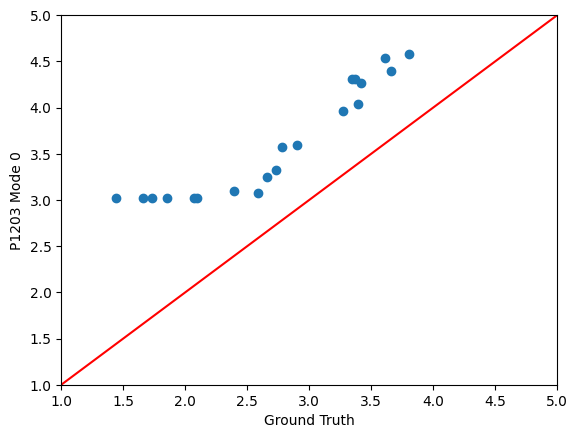

In [12]:
plt.scatter(qoe_ground_truth, p1203_qoe)
plt.plot([1, 5], [1, 5], color = 'red')
plt.axis([1, 5, 1, 5])
plt.xlabel("Ground Truth")
plt.ylabel("P1203 Mode 0")

Spearmann
              Ground truth     P1203
Ground truth      1.000000  0.941893
P1203             0.941893  1.000000


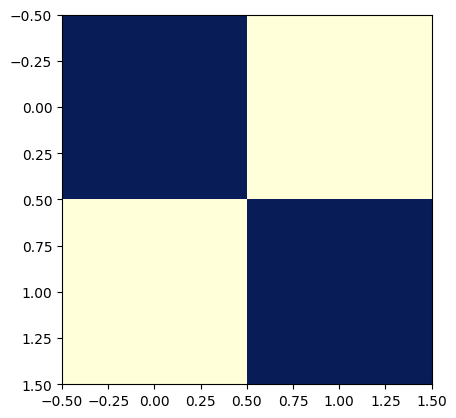

Pearson
              Ground truth     P1203
Ground truth      1.000000  0.930393
P1203             0.930393  1.000000


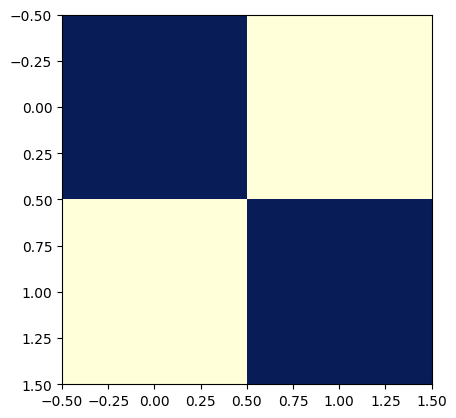

In [13]:
#import seaborn as sns
df_correlation = pd.DataFrame({'Ground truth': qoe_ground_truth,
                              'P1203': p1203_qoe})

spear_corr = df_correlation.corr(method = 'spearman') #pearson
print("Spearmann")
print(spear_corr)

#sns.heatmap(corr, cmap='YlGnBu', annot = True)
plt.imshow(spear_corr, cmap='YlGnBu')
plt.savefig("./figures/correlation_spearman_1203_1080p.pdf")
plt.show()

pearson_corr = df_correlation.corr(method = 'pearson') #spearman
print("Pearson")
print(pearson_corr)

#sns.heatmap(corr, cmap='YlGnBu', annot = True)
plt.imshow(pearson_corr, cmap='YlGnBu')
plt.savefig("./figures/correlation_pearson_1203_1080p.pdf")
plt.show()



# P1203.1 Pv coefficients updates


In [ ]:
# Quant(a1, a2, a3, a4) = a1 + a2*ln(a3+ln(bitrate) + ln(br*br/(codRes*fr) + a4))

# MOSq(q1, q2, q3) = q1 + q2*exp(q3*Quant)
# MOSq = max(min(MOSq, 5), 1)

# Dq = max(min(100 - RfromMOS(MOSq), 100), 0)

# MOSfromR:
#     MOS = MOS_min + (MOS_max - MOS_min) * R/100 + R*(R-60)(100-R)*0.000007
#     MOS = min(MOS_max, max(MOS, MOS_min))
#     Calculate MOSfromR, R from 0 -> 100, step 0.25

In [36]:
from functools import lru_cache
from itertools import permutations
import json
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from itu_p1203_new import P1203Standalone
from itu_p1203_new import P1203Pv


In [37]:
f = open("./mode0.json")
input_data = json.load(f)
# input_data

In [38]:
ground_truth_qoe_df = pd.read_csv('./results/individual_opinion_score_vpcc.csv')
ground_truth_qoe_df[['object', 'encoder', 'qual', 'dist']] = ground_truth_qoe_df.objects.str.split('_', expand=True)
ground_truth_qoe_df['rate_scaled'] = ground_truth_qoe_df['rate']

ground_truth_qoe_df

,ID,objects,rate,object,encoder,qual,dist,rate_scaled
0,1,BlueSpin_VPCC_r01_d200,1,BlueSpin,VPCC,r01,d200,1
1,1,FlowerDance_VPCC_r03_d200,2,FlowerDance,VPCC,r03,d200,2
2,1,ReadyForWinter_VPCC_r03_d200,3,ReadyForWinter,VPCC,r03,d200,3
3,1,BlueSpin_VPCC_r05_d200,3,BlueSpin,VPCC,r05,d200,3
4,1,ReadyForWinter_VPCC_r05_d200,3,ReadyForWinter,VPCC,r05,d200,3
...,...,...,...,...,...,...,...,...
815,41,FlowerDance_VPCC_r01_d200,2,FlowerDance,VPCC,r01,d200,2
816,41,BlueSpin_VPCC_r01_d200,2,BlueSpin,VPCC,r01,d200,2
817,41,BlueSpin_VPCC_r02_d200,2,BlueSpin,VPCC,r02,d200,2
818,41,ReadyForWinter_VPCC_r03_d200,4,ReadyForWinter,VPCC,r03,d200,4


In [39]:
ground_truth_qoe_df = ground_truth_qoe_df[['object', 'qual', 'rate_scaled']]
ground_truth_qoe_df

,object,qual,rate_scaled
0,BlueSpin,r01,1
1,FlowerDance,r03,2
2,ReadyForWinter,r03,3
3,BlueSpin,r05,3
4,ReadyForWinter,r05,3
...,...,...,...
815,FlowerDance,r01,2
816,BlueSpin,r01,2
817,BlueSpin,r02,2
818,ReadyForWinter,r03,4


In [40]:
# remove outliers using boxplot method
vpcc_group_columns = ['object', 'qual']
configurations = ground_truth_qoe_df.groupby(vpcc_group_columns)

def boxplot_outlier_filter(frame):
    """
    Outlier filter using interquantile range (filter below Q1 - 1.5 IQR and above Q3 + 1.5 IQR)

    :param frame: data frame
    :return: filtered frame
    """
    q1 = frame.quantile(0.25, numeric_only=True)["rate_scaled"]
    q3 = frame.quantile(0.75, numeric_only=True)["rate_scaled"]
    
    # interquantile range
    iqr = q3 - q1
    fence_low = q1 - (1.5*iqr)
    fence_high = q3 + (1.5*iqr)
    filtered = (frame["rate_scaled"] >= fence_low) & (frame["rate_scaled"] <= fence_high)
    return frame.loc[filtered]

# for each configuration, filter outliers
df_vpcc_filtered = None
for _, frame in configurations:
    #print(boxplot_outlier_filter(frame))
    df_vpcc_filtered = pd.concat([df_vpcc_filtered, boxplot_outlier_filter(frame)], axis=0)

df_vpcc_filtered = df_vpcc_filtered.reset_index(drop=True)
# groups = df_vpcc_filtered.groupby(vpcc_group_columns)


In [41]:
ground_truth_qoe_df = df_vpcc_filtered.loc[df_vpcc_filtered['object'].isin(['BlueSpin', 'CasualSquat', 'ReadyForWinter', 'FlowerDance'])]
ground_truth_qoe_grouped_df = ground_truth_qoe_df.groupby(['object', 'qual']).aggregate(lambda x: tuple(x))
ground_truth_qoe_grouped_df

rate_scaled
object         qual                                                   
BlueSpin       r01   (1, 2, 2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, ...
               r02   (2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
               r03   (2, 3, 2, 2, 3, 3, 2, 4, 2, 2, 3, 4, 2, 3, 3, ...
               r04   (3, 4, 2, 2, 5, 3, 4, 5, 3, 4, 3, 4, 3, 3, 5, ...
               r05   (3, 4, 2, 3, 4, 4, 4, 5, 3, 3, 4, 3, 3, 4, 4, ...
CasualSquat    r01   (1, 2, 2, 2, 3, 2, 1, 2, 1, 1, 3, 2, 3, 1, 2, ...
               r02   (2, 3, 1, 2, 3, 2, 2, 3, 2, 3, 3, 3, 2, 2, 3, ...
               r03   (2, 3, 2, 3, 4, 3, 2, 2, 2, 2, 4, 3, 2, 4, 3, ...
               r04   (2, 4, 3, 3, 3, 4, 4, 4, 2, 2, 4, 3, 2, 3, 5, ...
               r05   (3, 4, 3, 3, 4, 4, 2, 4, 3, 4, 4, 4, 2, 3, 4, ...
FlowerDance    r01   (1, 3, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, ...
               r02   (1, 3, 2, 2, 3, 3, 2, 1, 2, 2, 3, 3, 1, 3, 2, ...
               r03   (2, 4, 3, 2, 4, 3, 3, 3, 2, 2, 3, 3, 2, 3, 4, ...
               r04   (3, 4, 2, 3, 4, 3, 3, 4, 3, 3, 4, 3, 3, 3, 4, ...
               r05   (3, 5, 3, 3, 5, 4, 4, 3, 4, 4, 3, 4, 3, 4, 4, ...
ReadyForWinter r01   (1, 2, 2, 1, 2, 3, 1, 2, 1, 1, 2, 2, 1, 3, 1, ...
               r02   (2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
               r03   (3, 3, 1, 3, 2, 3, 2, 2, 2, 3, 3, 2, 3, 3, 4, ...
               r04   (3, 4, 2, 3, 3, 3, 3, 4, 2, 4, 4, 4, 3, 3, 5, ...
               r05   (3, 4, 2, 4, 5, 4, 3, 4, 3, 3, 3, 4, 3, 4, 5, ...

In [42]:
bitratesMbps = {
    'BlueSpin': {'r01': 1.75, 'r02': 2.29, 'r03': 3.17, 'r04': 7.53, 'r05': 12.62},
    'CasualSquat':  {'r01': 2.50, 'r02': 3.91, 'r03': 6.66, 'r04': 19.51, 'r05': 31.11},
    'ReadyForWinter':  {'r01': 1.97, 'r02': 2.58, 'r03': 3.61, 'r04': 9.34, 'r05': 16.59},
    'FlowerDance':  {'r01': 2.66, 'r02': 4.24, 'r03': 7.12, 'r04': 22.81, 'r05': 39.35},
}

resolution_map = {
    'r01': '640x360', # worse than 480p
    'r02': '852x480', # exactly 480p
    'r03': '1192x672', # bit worse than 720p
    'r04': '1533x864', # a bit better than 720p
    'r05': '1920x1080', # exactly 1080p

}

In [43]:
def calculate_p1203(coeffs):

    p1203_results = {
        'video': [],
        'qual': [],
        'bitrate': [],
        'p1203_qoe': []
    }

    for video in list(bitratesMbps.keys()):
        bitrates = list(bitratesMbps[video].values())
        qualities = list(bitratesMbps[video].keys())
        
        for bitrate, quality in zip(bitrates, qualities):
            p1203_results['video'].append(video)
            p1203_results['qual'].append(quality)
            p1203_results['bitrate'].append(bitrate)

            input_data['I13']['segments'][0]['bitrate'] = bitrate
            input_data['I13']['segments'][0]['resolution'] = resolution_map[quality]
            input_data['I13']['segments'][1]['bitrate'] = bitrate
            input_data['I13']['segments'][1]['resolution'] = resolution_map[quality]

            print("input data")
            print(input_data)
            
            qoe_p1203 = P1203Standalone(input_data, coeffs=coeffs).calculate_complete()['O46']
            
            p1203_results['p1203_qoe'].append(qoe_p1203)

    return p1203_results

In [44]:
def calculate_rmse(p1203_results, mos):
    joined_qoe = p1203_results.join(mos)
    rmse_arr = []

    for idx in np.arange(joined_qoe.shape[0]):
        targets = joined_qoe.iloc[idx,:]['rate_scaled']
        predictions = np.full(len(targets), joined_qoe.loc[joined_qoe.index[idx], 'p1203_qoe'])
        rmse_arr.append(np.sqrt(np.mean((predictions-targets)**2)))
    
    return np.average(rmse_arr)


In [45]:
_COEFFS = {
        "u1": 72.61,
        "u2": 0.32,
        "t1": 30.98,
        "t2": 1.29,
        "t3": 64.65,
        "q1": 4.66,
        "q2": -0.07,
        "q3": 4.06,
        "mode0": {
            "a1": 11.9983519,
            "a2": -2.99991847,
            "a3": 41.2475074001,
            "a4": 0.13183165961,
        },
        "mode1": {
            "a1": 5.00011566,
            "a2": -1.19630824,
            "a3": 41.3585049,
            "a4": 0,
            "c0": -0.91562479,
            "c1": 0,
            "c2": -3.28579526,
            "c3": 20.4098663,
        },
        "htv_1": -0.60293,
        "htv_2": 2.12382,
        "htv_3": -0.36936,
        "htv_4": 0.03409,
    }

def finetune_coeffs():
    min_rmse = sys.float_info.max
    optimized_coeffs = _COEFFS
    optimized_p1203_qoe  =[]

    # for _COEFFS['u1'] in np.arange(50,100):
    #     for _COEFFS['u2'] in np.arange(1):
            # for _COEFFS['t1'] in np.arange(1):
            #     for _COEFFS['t2'] in np.arange(1):
            #         for _COEFFS['t3'] in np.arange(1):
                        # for _COEFFS['q1'] in np.arange(1):
                        #     for _COEFFS['q2'] in np.arange(1):
                        #         for _COEFFS['q3'] in np.arange(1):
    for _COEFFS['mode0']['a1'] in np.arange(1, 15, 0.1): # 0.5 range originally
        for _COEFFS['mode0']['a2'] in np.arange(-5, 0, 0.1): # 0.5 range originally
            for _COEFFS['mode0']['a3'] in np.arange(0, 80, 1): # 1 range originally
                for _COEFFS['mode0']['a4'] in np.arange(0, 5, 0.1): # 0.5 range originally
                    # print(_COEFFS)
                    qoe_p1203_dict = calculate_p1203(_COEFFS)
                    p1203_df = pd.DataFrame.from_dict(qoe_p1203_dict)

                    # Fine tune aka train with BlueSpin and CasualSquat
                    p1203_df = p1203_df.loc[p1203_df['video'].isin(['BlueSpin', 'CasualSquat'])]
                    grouped_p1203_qoe = p1203_df.groupby(['video', 'qual']).mean()

                    rmse = calculate_rmse(grouped_p1203_qoe, ground_truth_qoe_grouped_df)

                    if rmse < min_rmse:
                        print("==> RMSE: " + str(rmse))
                        print("==> _COEFFS: " + str(_COEFFS))
                        
                        optimized_coeffs = _COEFFS
                        min_rmse = rmse
                        optimized_p1203_qoe = list(grouped_p1203_qoe['p1203_qoe'])
    

    return optimized_coeffs, optimized_p1203_qoe, min_rmse

In [46]:
optimized_coeffs, p1203_qoe_list, min_rmse =  finetune_coeffs()
print(optimized_coeffs, p1203_qoe_list, min_rmse)

input data
{'I11': {'segments': [{'bitrate': 331.46, 'codec': 'aaclc', 'duration': 5.48, 'start': 0}, {'bitrate': 333.02, 'codec': 'aaclc', 'duration': 5.0, 'start': 5.48}, {'bitrate': 333.2, 'codec': 'aaclc', 'duration': 5.0, 'start': 10.48}, {'bitrate': 333.57, 'codec': 'aaclc', 'duration': 4.598, 'start': 15.48}], 'streamId': 42}, 'I13': {'segments': [{'bitrate': 1.75, 'codec': 'h264', 'duration': 5.48, 'fps': 25.0, 'resolution': '640x360', 'start': 0}, {'bitrate': 1.75, 'codec': 'h264', 'duration': 5.0, 'fps': 25.0, 'resolution': '640x360', 'start': 5.48}, {'bitrate': 7172.66, 'codec': 'h264', 'duration': 5.0, 'fps': 25.0, 'resolution': '1920x1080', 'start': 10.48}, {'bitrate': 6593.59, 'codec': 'h264', 'duration': 4.598, 'fps': 25.0, 'resolution': '1920x1080', 'start': 15.48}], 'streamId': 42}, 'I23': {'stalling': [], 'streamId': 42}, 'IGen': {'device': 'pc', 'displaySize': '1920x1080', 'viewingDistance': '150cm'}}


TypeError: P1203Standalone.__init__() got an unexpected keyword argument 'coeffs'

In [ ]:
ground_truth_qoe_list = list(ground_truth_qoe_df.groupby(['video', 'start_quality', 'end_quality']).mean()['qoe_scaled'])
ground_truth_qoe_list

In [ ]:
#==============================================================================================================================
#FOUND THE BEST

In [ ]:
coeffs = {'u1': 72.61, 'u2': 0.32, 't1': 30.98, 't2': 1.29, 't3': 64.65, 'q1': 4.4, 'q2': -1.5, 'q3': 1.5, 'mode0': {'a1': 5, 'a2': -1.0, 'a3': 130, 'a4': 4.0}, 'mode1': {'a1': 5.00011566, 'a2': -1.19630824, 'a3': 41.3585049, 'a4': 0, 'c0': -0.91562479, 'c1': 0, 'c2': -3.28579526, 'c3': 20.4098663}, 'htv_1': -0.60293, 'htv_2': 2.12382, 'htv_3': -0.36936, 'htv_4': 0.03409}

qoe_p1203_dict = calculate_p1203(coeffs)
p1203_df = pd.DataFrame.from_dict(qoe_p1203_dict)

p1203_df = p1203_df.loc[p1203_df['video'].isin(['BlueSpin', 'CasualSquat'])]
grouped_p1203_qoe = p1203_df.groupby(['video', 'start_quality', 'end_quality']).mean()
grouped_p1203_qoe

In [ ]:
p1203_qoe_list = list(grouped_p1203_qoe['p1203_qoe'])
plt.scatter(ground_truth_qoe_list, p1203_qoe_list)
plt.plot([1, 5], [1, 5], color = 'red')
plt.axis([1, 5, 1, 5])
plt.xlabel("Ground Truth")
plt.ylabel("Fine-tuned P1203 Mode 0")

In [ ]:
import seaborn as sns

df_correlation = pd.DataFrame({
    "Ground truth": ground_truth_qoe_list,
    "P.1203": p1203_qoe_list
})

corr_method = 'spearman'
corr = df_correlation.corr(method=corr_method)
sns.heatmap(corr, cmap='YlGnBu', annot = True)
plt.savefig('./figures/correlation_heatmap_' + corr_method + '_optimized.pdf')
plt.show()

In [ ]:
corr_method = 'pearson'
corr = df_correlation.corr(method=corr_method)
sns.heatmap(corr, cmap='YlGnBu', annot = True)
plt.savefig('./figures/correlation_heatmap_' + corr_method + '_optimized.pdf')
plt.show()

In [ ]:
#==============================================================================================================================
#VALIDATING with ReadyForWinter and FlowerDance

In [ ]:
coeffs = {'u1': 72.61, 'u2': 0.32, 't1': 30.98, 't2': 1.29, 't3': 64.65, 'q1': 4.4, 'q2': -1.5, 'q3': 1.5, 'mode0': {'a1': 5, 'a2': -1.0, 'a3': 130, 'a4': 4.0}, 'mode1': {'a1': 5.00011566, 'a2': -1.19630824, 'a3': 41.3585049, 'a4': 0, 'c0': -0.91562479, 'c1': 0, 'c2': -3.28579526, 'c3': 20.4098663}, 'htv_1': -0.60293, 'htv_2': 2.12382, 'htv_3': -0.36936, 'htv_4': 0.03409}

qoe_p1203_dict = calculate_p1203(coeffs)
qoe_p1203_df = pd.DataFrame(qoe_p1203_dict)
qoe_p1203_df = qoe_p1203_df.loc[qoe_p1203_df['video'].isin(['ReadyForWinter', 'FlowerDance']) & 
                                ((qoe_p1203_df['start_quality'].isin(['r1']) & qoe_p1203_df['end_quality'].isin(['r1'])) |
                                 (qoe_p1203_df['start_quality'].isin(['r3']) & qoe_p1203_df['end_quality'].isin(['r3'])) |
                                 (qoe_p1203_df['start_quality'].isin(['r5']) & qoe_p1203_df['end_quality'].isin(['r5']))) ]
qoe_validation = qoe_p1203_df.groupby(['video', 'start_quality', 'end_quality']).mean()
qoe_validation

In [ ]:
# Get ground truth qoe for these sequences
ground_truth_qoe_df = df_vpcc_filtered.loc[df_vpcc_filtered['video'].isin(['ReadyForWinter', 'FlowerDance'])]
ground_truth_qoe_grouped_df = ground_truth_qoe_df.groupby(['video', 'start_quality', 'end_quality']).aggregate(lambda x: tuple(x))
ground_truth_qoe_grouped_df

In [ ]:
calculate_rmse(qoe_validation, ground_truth_qoe_grouped_df)

In [ ]:
ground_truth_list = list(ground_truth_qoe_df.groupby(['video', 'start_quality', 'end_quality']).mean()['qoe_scaled'])
qoe_validation_list = list(qoe_validation['p1203_qoe'])
ground_truth_list

In [ ]:
plt.scatter(ground_truth_list, qoe_validation_list)
plt.plot([1, 5], [1, 5], color='red')
plt.axis([1, 5, 1, 5])
plt.xlabel('Ground Truth')
plt.ylabel('Fine-tuned P1203 Mode 0 - Validation')
plt.show()

In [ ]:
corr_method = 'spearman'
corr_df = pd.DataFrame({
    'Fine-tuned P1203': qoe_validation_list,
    'Ground truth': ground_truth_list
})

corr_methods = ['spearman', 'pearson']

for corr_method in corr_methods:
    corr = corr_df.corr(method=corr_method)
    sns.heatmap(corr, cmap='YlGnBu', annot = True)
    plt.savefig('./figures/correlation_heatmap_' + corr_method + '_validation.pdf')
    plt.title(corr_method)
    plt.show()

In [ ]:
# original P1203
_COEFFS = {
        "u1": 72.61,
        "u2": 0.32,
        "t1": 30.98,
        "t2": 1.29,
        "t3": 64.65,
        "q1": 4.66,
        "q2": -0.07,
        "q3": 4.06,
        "mode0": {
            "a1": 11.9983519,
            "a2": -2.99991847,
            "a3": 41.2475074001,
            "a4": 0.13183165961,
        },
        "mode1": {
            "a1": 5.00011566,
            "a2": -1.19630824,
            "a3": 41.3585049,
            "a4": 0,
            "c0": -0.91562479,
            "c1": 0,
            "c2": -3.28579526,
            "c3": 20.4098663,
        },
        "htv_1": -0.60293,
        "htv_2": 2.12382,
        "htv_3": -0.36936,
        "htv_4": 0.03409,
    }

qoe_p1203_dict = calculate_p1203(_COEFFS)
qoe_p1203_df = pd.DataFrame(qoe_p1203_dict)
qoe_p1203_df = qoe_p1203_df.loc[qoe_p1203_df['video'].isin(['ReadyForWinter', 'FlowerDance']) & 
                                ((qoe_p1203_df['start_quality'].isin(['r1']) & qoe_p1203_df['end_quality'].isin(['r1'])) |
                                 (qoe_p1203_df['start_quality'].isin(['r3']) & qoe_p1203_df['end_quality'].isin(['r3'])) |
                                 (qoe_p1203_df['start_quality'].isin(['r5']) & qoe_p1203_df['end_quality'].isin(['r5']))) ]
qoe_original_p1203 = qoe_p1203_df.groupby(['video', 'start_quality', 'end_quality']).mean()
qoe_original_p1203

In [ ]:
print(calculate_rmse(qoe_original_p1203, ground_truth_qoe_grouped_df))
qoe_original_p1203_list = list(qoe_original_p1203['p1203_qoe'])

In [ ]:
plt.scatter(ground_truth_list, qoe_original_p1203_list)
plt.plot([1, 5], [1, 5], color='red')
plt.axis([1, 5, 1, 5])
plt.xlabel('Ground Truth')
plt.ylabel('Original P1203 Mode 0')
plt.show()

In [ ]:
corr_all_df = pd.DataFrame({
    "Ground truth": ground_truth_list,
    # "Fine-tuned P1203": qoe_validation_list,
    "Original P1203": qoe_original_p1203_list
})

corr_methods = ['spearman', 'pearson']
for corr_method in corr_methods:
    corr = corr_all_df.corr(method=corr_method)
    sns.heatmap(corr, cmap='YlGnBu', annot=True)
    plt.title(corr_method)
    plt.show()

# Point cloud density

In [ ]:
import numpy as np
import open3d as o3d

In [ ]:
"""
Provides methods for calculating point cloud densities.
All methods can handle instances of PLYObject or list or ndarray instances of lists of vertices.
"""

import numpy as np
import scipy.spatial

def getRealDensityFromPlane(ply, planeParams):
	"""
	Calculates the point density from a given PLY plane object (or array of vertices).

	For calculating the correct point density, the given plane object will be z-aligned.
	For this process, the fitted plane parameters need to be specified. If the passed
	object is a PLYObject instance and has a fitPlane method, you can set planeParams to
	None. The plane fitting will then be done automatically.

	:param ply: Instance of PLYObject or list of vertices. If passed as ndarray (or list), a (N,3) array is expected.
	:param planeParams: Tuple of plane params fitted to the vertices. Set to None if the first parameter is a PLYObject instance and let the plane fitting run automatically.

	:returns: Point density for the given plane. The unit is depending on the unit of the passed vertices.
	"""

	if planeParams is None:
		fitPlaneMethod = getattr(ply, 'fitPlane', None)

		if callable(fitPlaneMethod):
			planeParams = fitPlaneMethod()
		else:
			raise ValueError('No plane parameters given and unable to fit plane to vertices')
	elif len(planeParams) != 4:
		raise ValueError('Invalid number of values for plane parameters')

	vertices = _getVertices(ply)

	zAxis = np.array([0.0, 0.0, 1.0])
	planeNormal = np.array(planeParams[:3])
	planeNormalLength = np.linalg.norm(planeNormal)
	unitPlaneNormal = planeNormal / planeNormalLength

	vec = planeNormal / planeNormalLength**2

	# A = unitPlaneNormal
	# B = zAxis

	# Shift plane to origin
	vertices += vec

	# Find roation aligning the plane normal vector to Z axis
	vecDot = unitPlaneNormal.dot(zAxis)
	vecCross = np.cross(zAxis, unitPlaneNormal)
	vecCrossNorm = np.linalg.norm(vecCross)

	G = np.array([[vecDot, -1 * vecCrossNorm, 0], [vecCrossNorm, vecDot, 0], [0, 0, 1]])

	u = unitPlaneNormal
	v = (zAxis - vecDot * unitPlaneNormal) / np.linalg.norm(zAxis - vecDot * unitPlaneNormal)
	w = vecCross
	Finv = np.column_stack([u, v, w])

	U = Finv.dot(G.dot(np.linalg.inv(Finv)))

	# Apply rotation to vertices to align them with axis
	vertices = U.dot(vertices.T).T

	# Use naiv method to get density
	hull = scipy.spatial.ConvexHull(vertices[:, :2])

	# Note: As the hull was calculated in 2D space,
	# the hull 'volume' is actually the surface area.
	return vertices.shape[0] / hull.volume

def getNaivDensityFromPlane(ply, alignedAxis=2):
	"""
	Calculates the point density a given PLY plane object (or array of vertices) assuming the plane is nearly aligned to a given axis.

	The vertices are simply projected on the coordinate plane they are nearly aligned to.
	This should give a good estimation of the point density.

	:param ply: Instance of PLYObject or list of vertices. If passed as ndarray (or list), a (N,3) array is expected.
	:param alignedAxis: The axis the plane object is nearly perpendicular to. Coordinates for this axis will be set to 0.

	:returns: Point density for the given plane. The unit is depending on the unit of the passed vertices.
	"""

	idx = np.array([0, 1, 2])
	idx = idx[idx != alignedAxis]
	v = _getVertices(ply)
	v = v[:, idx]

	hull = scipy.spatial.ConvexHull(v)

	# Note: As the hull was calculated in 2D space,
	# the hull 'volume' is actually the surface area.
	return v.shape[0] / hull.volume

def getRealDensityFromObject(ply):
	"""
	Calculates the point density a given PLY object (or array of vertices).

	:param ply: Instance of PLYObject or list of vertices. If passed as ndarray (or list), a (N,d) array is expected. N is the number of points, d is the dimensionality.

	:returns: Point density for the given object. The unit is depending on the unit of the passed vertices.
	"""
	vertices = _getVertices(ply)
	hull = scipy.spatial.ConvexHull(vertices)

	# Note: As the hull was calculated in 2D space,
	# the hull 'volume' is actually the surface area.
	return vertices.shape[0] / hull.volume

def _getVertices(ply):
	getVerticesMethod = getattr(ply, 'getVertices', None)

	if callable(getVerticesMethod):
		vertices = getVerticesMethod().T
	elif isinstance(ply, np.ndarray):
		vertices = ply
	else:
		vertices = np.array(ply)

	# print("==> {}".format(vertices))

	if len(vertices.shape) != 2 or vertices.shape[1] != 3:
		raise ValueError('Invalid number of dimensions (transpose necesary?)')

	return vertices

In [ ]:
ply_file_root = '/Users/minhkstn/Downloads/BlueSpin_r0'
for i in np.arange(1,6):
    ply_file = ply_file_root + str(i) + '_0000.ply'
    pcd = o3d.io.read_point_cloud(ply_file)
    density = getRealDensityFromObject(pcd.points)

    print("quality {}: {}".format(i, density))

In [ ]:
from plyfile import PlyData, PlyElement
ply_file = '/Users/minhkstn/Downloads/binary_BlueSpin_dec_0000.ply'
# f_out = open("/Users/minhkstn/Downloads/BlueSpin_dec_0000.ply", 'w+')

# f_in = open(ply_file, 'r')

# data = PlyData.read(f_in)
# data.text = True
# data.write(f_out)
# f_in.close()
# f_out.close()

In [ ]:
data = PlyData.read(ply_file)
data.text = True
data.comments = data.comments + ['original path: somefile.ply']
data.write('newfile.ply')

In [ ]:
pcd = o3d.io.read_point_cloud('newfile.ply')
getRealDensityFromObject(pcd.points)

In [ ]:
print(np.asarray(pcd.points))

In [ ]:
# AllPoints = np.asarray(pcd.points)
# R = 100; 
# density = []
# for i in range(len(AllPoints)):
#     distances = []
#     centroid = AllPoints[i]
#     distances.append(np.linalg.norm(centroid - AllPoints, axis=1))
#     # print(distances[-1])
#     density.append(sum(i < R for i in distances[-1]) - 1)
# density

In [ ]:
import os
rootpath = '/home/shared2/spirit/subjective_test/raw_data/UVG-VPC/vpcc'
videos = ['BlueSpin', 'FlowerDance', 'HelloGoodbye', 'ReadyForWinter']
rates = ['r01-dec', 'r02-dec', 'r03-dec', 'r04-dec', 'r05-dec']
mypaths = [os.path.join(rootpath, video, rate) for video in videos for rate in rates]
mypaths

In [ ]:
rootpath = '/home/shared2/spirit/subjective_test/raw_data/UVG-VPC/vpcc'
videos = ['BlueSpin', 'FlowerDance', 'HelloGoodbye', 'ReadyForWinter']
rates = ['r01-dec/', 'r02-dec/', 'r03-dec/', 'r04-dec/', 'r05-dec/']
# mypaths = [os.path.join(rootpath, video, rate) for video in videos for rate in rates]

for video in videos:
    firstpath = os.path.join(rootpath, video) 
    mypaths = [os.path.join(firstpath, rate) for rate in rates]
    for mypath in mypaths:

        folderToMake = "-binary"
        pathToMake = os.path.join(firstpath, mypath.split('/')[-2] + folderToMake)
        print(pathToMake)